# Exercises: Image Analysis

There's only one problem today: build and tweak a classification model until it works quite well.

1. Choose a dataset on Kaggle. Check the [computer vision tag](https://www.kaggle.com/datasets?tags=13207-Computer+Vision). I recommend looking for fairly small datasets (under a few hundred MB). Here's one that we can try together: [Satellite Image Classification](https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification) or [Is it on fire?](https://www.kaggle.com/datasets/phylake1337/fire-dataset)
2. Load the data in. Setting up a DataBlock to load in the data is hard the first time, as the folder structure may not be the same as we used before. This page in the [fastai documentation](https://docs.fast.ai/data.transforms.html) includes various kinds of splitters and labelers, but you may have to write your own.
3. Try the different optimizations we've used in class. Figure out which ones are actually worthwhile. Mess around with the batch size to efficiently use the GPU memory.
4. Train your data for a bunch (20 or so, depending on size) epochs and see if you get a good result.
5. Check out the confusion matrix and use `learn.recorder.plot_loss()` to make a plot of the loss. Comment.
6. Check out what other Kaggle users have achieved in their notebooks. How do your results compare?

In [ ]:
from fastai.vision.all import *

In [ ]:
%env KAGGLE_USERNAME="donnydutch"
%env KAGGLE_KEY="e000856dbf910d714ae70609d63d00aa"

!kaggle datasets download -d phylake1337/fire-dataset
!unzip fire-dataset.zip


env: KAGGLE_USERNAME="donnydutch"
env: KAGGLE_KEY="e000856dbf910d714ae70609d63d00aa"
Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset
License(s): CC0-1.0
 99% 383M/387M [00:07<00:00, 54.8MB/s]
100% 387M/387M [00:07<00:00, 51.7MB/s]
Archive:  fire-dataset.zip
  inflating: fire_dataset/fire_images/fire.1.png  
  inflating: fire_dataset/fire_images/fire.10.png  
  inflating: fire_dataset/fire_images/fire.100.png  
  inflating: fire_dataset/fire_images/fire.101.png  
  inflating: fire_dataset/fire_images/fire.102.png  
  inflating: fire_dataset/fire_images/fire.103.png  
  inflating: fire_dataset/fire_images/fire.104.png  
  inflating: fire_dataset/fire_images/fire.105.png  
  inflating: fire_dataset/fire_images/fire.106.png  
  inflating: fire_dataset/fire_images/fire.107.png  
  inflating: fire_dataset/fire_images/fire.108.png  
  inflating: fire_dataset/fire_images/fire.109.png  
  inflating: fire_dataset/fire_images/fire.11.png  
  inflating: fire_dataset/fire_imag

In [ ]:
path = Path("/content/fire_dataset")


In [ ]:

smol1 = Path("smol")

resize_images(path/'fire_images', dest=smol1/'fire_images', max_size=128, recurse=True)
resize_images(path/'non_fire_images', dest=smol1/'non_fire_images', max_size=128, recurse=True)

In [ ]:
fire = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed = 42),
                 get_y = parent_label,
                 item_tfms=Resize(128),
                 batch_tfms=[*aug_transforms(size=84, min_scale=0.75, max_rotate=90, flip_vert=True),
                    Normalize()])
dls = fire.dataloaders(smol1, bs=256)

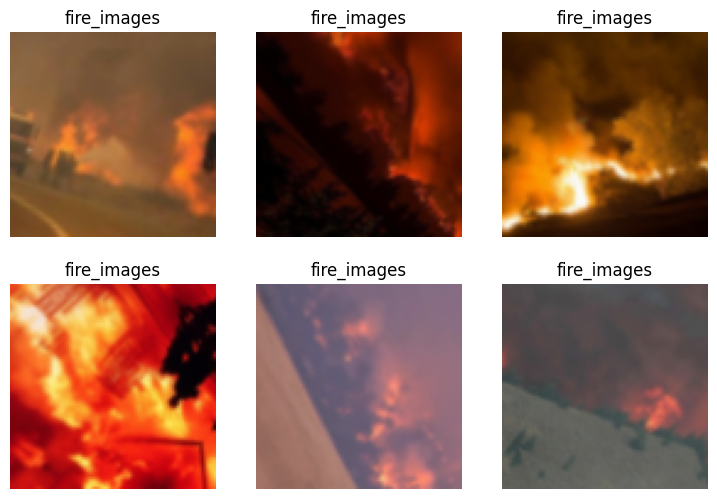

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)
learn.fine_tune(10)


epoch,train_loss,valid_loss,error_rate,time
0,1.194952,0.409109,0.160804,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.698938,0.207911,0.075377,00:02
1,0.626243,0.163933,0.040201,00:02
2,0.593276,0.148729,0.045226,00:03
3,0.568979,0.140760,0.035176,00:02
4,0.515687,0.141062,0.035176,00:02
5,0.462169,0.135752,0.035176,00:02
6,0.423122,0.122102,0.030151,00:03
7,0.389002,0.105141,0.025126,00:03
8,0.358106,0.099108,0.030151,00:02
9,0.337241,0.093699,0.025126,00:02


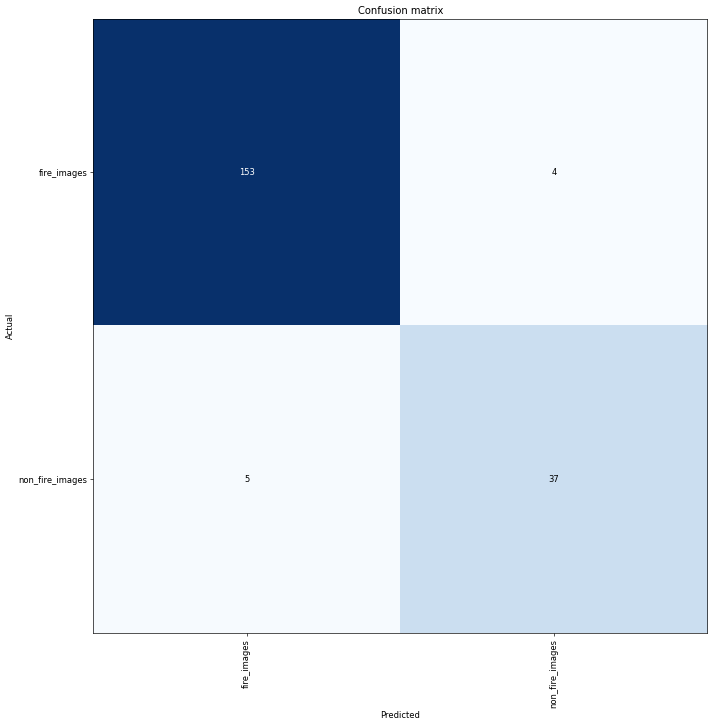

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0010000000474974513)

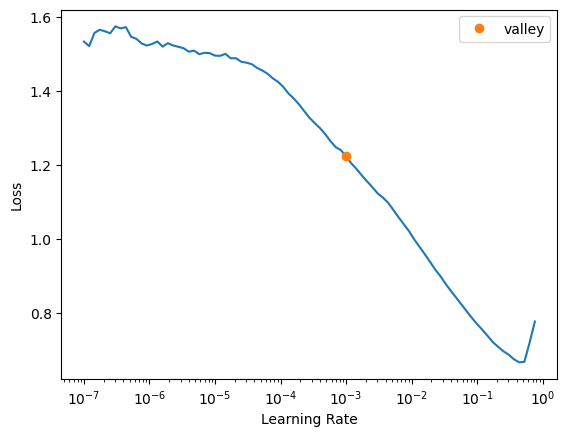

In [ ]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)
learn.lr_find()